# Notebook to Load Data and Perform Dimensionality Reduction using PCA

## Imports

In [1]:
# imports
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

print('Done imports!')

Done imports!


## Load Data

In [7]:
# create column header names
inp_names = list(range(60))
names = inp_names + ['Rock_or_Mine']

# read in data
df = pd.read_csv('sonar.all-data', names=names)

# change target to binary
df['Rock_or_Mine'] = pd.get_dummies(df.Rock_or_Mine)['M']

# show
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,Rock_or_Mine
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,1
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,1
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,1
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,1


## Perform Principle Component Analysis

In [8]:
# choose number of components to keep
nc = 5

# select input and target columns
X = df[inp_names].to_numpy()
Y = df['Rock_or_Mine'].to_numpy()

# inititate PCA
pca=PCA(n_components=nc)

# fit PCA
pca.fit(X)

# transform data
X_pca = pca.transform(X)

print('Done PCA!')

Done PCA!


## Split data

In [9]:
# split into training and validation sets
X_tr_pca,X_va_pca,Y_tr,Y_va = train_test_split(X_pca,Y ,test_size=0.25, random_state=42)

In [11]:
# normalize
scaler = StandardScaler()

scaler.fit(X_tr_pca)
X_tr_pca = scaler.transform(X_tr_pca)
X_va_pca = scaler.transform(X_va_pca)

## Show Results of PCA on Training Data

In [12]:
# load pca input training data into data frame
df_tr_pca = pd.DataFrame(data=X_tr_pca, columns=list(range(nc)))

# add targets traininfg data
df_tr_pca['Rock_or_Mine'] = Y_tr

# show
df_tr_pca 

,0,1,2,3,4,Rock_or_Mine
0,-0.402262,-0.171265,1.970864,-0.635889,-0.278964,0
1,-1.784682,1.089177,0.709784,0.478986,-1.287024,0
2,0.217305,-1.279092,0.274127,0.159032,0.059130,0
3,0.613350,-0.629725,0.534751,0.610865,0.597343,0
4,0.559920,-0.416450,0.135269,2.612878,-1.542240,1
...,...,...,...,...,...,...
151,-0.539264,0.986727,-0.799502,-0.686408,0.050471,1
152,0.131782,0.317387,0.055343,-1.252723,-1.589908,0
153,0.680702,-0.802942,1.930105,-0.374455,0.143807,0
154,0.449958,-0.797578,0.317654,0.851720,0.579181,1


## Quantum Kernel Machine

In [13]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import pylab as pl


#ScikitLearn Imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.svm import SVC 

#Qiskit imports
from qiskit import QuantumCircuit, Aer,QuantumRegister, ClassicalRegister, execute, IBMQ
from qiskit.circuit import ParameterVector,Parameter
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZFeatureMap, ZZFeatureMap, PauliFeatureMap
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit_machine_learning.kernels import QuantumKernel


In [14]:
simulator = Aer.get_backend('qasm_simulator')
SEED = 102855
shots = 8092
qinst = QuantumInstance(simulator, shots, SEED)

In [15]:
reps = [1,2,3]
scores = []

In [16]:
for rep in reps:
    map_z = ZZFeatureMap(feature_dimension=5, reps=rep, entanglement= "linear")
    z_kernel = QuantumKernel(feature_map=map_z, quantum_instance=qinst)
    train_matrix= z_kernel.evaluate(x_vec=X_tr_pca)
    test_matrix = z_kernel.evaluate(x_vec=X_va_pca, y_vec=X_tr_pca)
    model = SVC(kernel= z_kernel.evaluate)
    model.fit(X_tr_pca, Y_tr)
    score = model.score(X_va_pca, Y_va)
    scores.append(score)
    print("Finished rep:",rep)
print(scores)

/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Finished rep: 1


/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Finished rep: 2


/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Finished rep: 3
[0.5769230769230769, 0.40384615384615385, 0.5384615384615384]


### With Autoencoder data

In [17]:
df = pd.read_csv('AE-compressed-data.csv', index_col=0)
df

,0,1,2,3,4,5
0,2.788435,2.103543,0.426437,0.581858,2.396140,R
1,-1.307888,-2.164024,-1.066672,-1.517550,0.061261,R
2,-1.298477,-2.415981,-3.042823,-2.050905,-0.316739,R
3,0.395220,-0.696221,-4.280332,-0.840407,-0.300237,R
4,0.369320,0.290131,-1.010054,-0.369055,-0.462238,R
...,...,...,...,...,...,...
203,4.255006,-11.108311,12.098848,-7.865163,2.242853,M
204,4.755203,-12.442458,14.157688,-8.750379,3.495333,M
205,5.660632,-13.285556,14.795799,-9.541072,3.525391,M
206,-0.430536,-7.141647,9.218877,-3.829817,2.128929,M


In [18]:

X = df[['0','1','2','3','4']].to_numpy()
Y = df['5'].to_numpy()
X_tr,X_va,Y_tr,Y_va = train_test_split(X,Y ,test_size=0.25, random_state=42)

In [19]:
# normalize
scaler = StandardScaler()

scaler.fit(X_tr)
X_tr = scaler.transform(X_tr)
X_va = scaler.transform(X_va)

In [20]:
scores_ae = []

In [21]:
for rep in reps:
    ae_map_z = ZZFeatureMap(feature_dimension=5, reps=rep, entanglement= "linear") 
    ae_z_kernel = QuantumKernel(feature_map=ae_map_z, quantum_instance=qinst)
    train_matrix_ae= ae_z_kernel.evaluate(x_vec=X_tr)
    test_matrix_ae = ae_z_kernel.evaluate(x_vec=X_va, y_vec=X_tr)
    model_ae = SVC(kernel= ae_z_kernel.evaluate)
    model_ae.fit(X_tr, Y_tr)
    score = model_ae.score(X_va, Y_va)
    scores_ae.append(score)
    print("Finished rep:",rep)
print(scores_ae)

/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Finished rep: 1


/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Finished rep: 2


/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/opt/homebrew/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


Finished rep: 3
[0.7115384615384616, 0.6538461538461539, 0.6153846153846154]


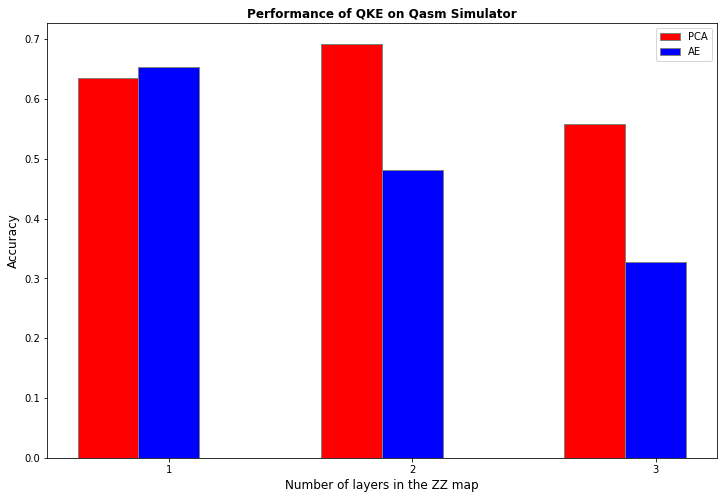

In [22]:
import matplotlib.pyplot as plt

barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
scores_pca = [0.6346153846153846, 0.6923076923076923, 0.5576923076923077]
scores_ae = [0.6538461538461539, 0.4807692307692308, 0.3269230769230769]
 
# Set position of bar on X axis
br1 = np.arange(len(scores_pca))
br2 = [x + barWidth for x in br1]
 
# Make the plot
plt.bar(br1, scores_pca, color ='r', width = barWidth,
        edgecolor ='grey', label ='PCA')
plt.bar(br2, scores_ae, color ='b', width = barWidth,
        edgecolor ='grey', label ='AE')
 
# Adding Xticks
plt.xlabel('Number of layers in the ZZ map', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.xticks([r + barWidth for r in range(len(scores_pca))],
        ['1','2','3'])

plt.title("Performance of QKE on Qasm Simulator", fontweight ='bold', fontsize = 12) 
plt.legend()
plt.show()